**Imports** <br>
The K-Means model will be built using the KMeans class in SciKit-Learn. <br>
The MNIST dataset will be imported from the Keras Datasets library.

In [ ]:
import numpy
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import copy

(x_train_init, y_train_init), (x_test_init, y_test_init) = mnist.load_data() #Loading the MNIST Dataset from keras

print(x_train.shape) #The dataset has 60000 trainig samples. Each image consists of 784 datapoints which correspond to the grayscale values of the handwritten digit image
print(x_test.shape) #The data set has 10000 testing samples.

(60000, 784)
(10000, 784)


**Preprocessing** <br>
* Data Normalization:
  * The input data needs to be normalized so that each input parameter has a similar data distribution.
  * The x_train and x_test datasets are divided by 255 such that the input values are in a range of [0, 1].

**K-Means Clustering** <br>
* k_means_func
  * Inputs: 
    * a list of N data vectors to be clustered.
    * Number of clusters. The number of clusters will be 10 since there are 10 digits thast need to be classified. 
  * Outputs:
    * A list of N group assignment indicies which indicate the association of each data vector to a specific group


[0 1 2 3 4 5 6 7 8 9]
(60000, 10)
[6.594860334735799, 4.742058743920175, 6.885096762033642, 5.432109933730174, 5.597654603623156, 6.6763346450089305, 5.526408291711713, 6.073104458811919, 4.5441124629660905, 5.519369659371366, 5.962830630016287, 6.285589914579297, 6.145723389230382, 5.600560072882008, 4.441783777475452, 5.496102401124907, 6.348769306883329, 5.701918221497612, 6.039914353978503, 4.993689554013356, 7.619491841652305, 5.487753390103511, 4.859151302640977, 5.3891791825145, 6.773320356100488, 7.372009043040602, 5.062306913572871, 7.614368369081965, 9.253940145062188, 5.45317053692449, 7.361059794216159, 7.230444859365859, 5.249311445714464, 4.957071430918806, 6.868961115251523, 6.111652902165887, 5.871386198601097, 5.450698990581306, 6.231482530422987, 4.943841778582169, 3.692058095086863, 5.20624744874825, 5.088092118013898, 5.500380227969793, 6.347827653739871, 4.771229276139639, 6.045355888337082, 6.6017521365255, 6.117523849600627, 5.803466736746177, 5.674221028717897, 

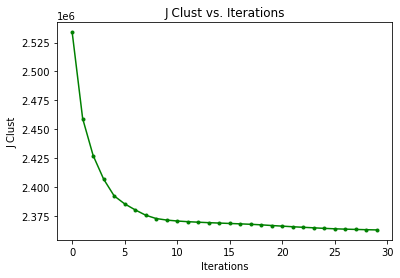

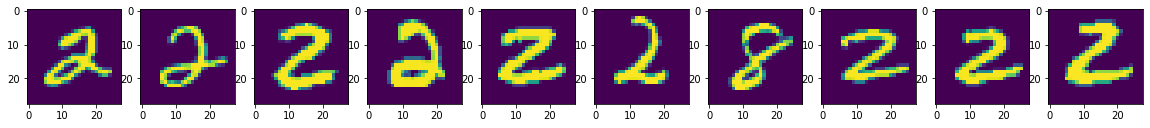

In [ ]:
x_train = numpy.reshape(x_train_init, (x_train_init.shape[0], x_train_init.shape[1]*x_train_init.shape[2]))/255
x_test = numpy.reshape(x_test_init, (x_test_init.shape[0], x_test_init.shape[1]*x_test_init.shape[2]))/255

# print(x_train[0])

unique_classes = numpy.unique(y_train)
unique_classes_size = len(unique_classes)

#input_data = List of N data vectors to be clustered
#K = number of clusters
#P = number of iterations to train the model
#Initialization Technique = Randomly assigning K data points as K group representatives

def run_k_means(input_data, K, P):
  group_assignment_indicies = []
  list_of_k_group_representatives = []
  j_clust = []

  initial_centroids = input_data[numpy.random.choice(len(input_data), size=K, replace=False)] #Randomly assigning k data points as K group representatives
  centroids = initial_centroids
  #For loop which trains the model P times
  for iteration in range(P):
    model = KMeans(n_clusters=K, init=centroids, max_iter=1, n_init = 1, tol=0.001)
    model_fit = model.fit(input_data)
    # centroids = copy.deepcopy(model.cluster_centers_)
    centroids = model.cluster_centers_
    j_clust.append(model.inertia_)

  group_assignment_indicies = model.labels_
  list_of_k_group_representatives = model.cluster_centers_
  plot_j_clust(P, j_clust)
  distance_matrix = model.transform(input_data)

  return group_assignment_indicies, list_of_k_group_representatives, j_clust, distance_matrix

def plot_j_clust(P, j_clust):
  x_range = numpy.array(range(P)).reshape(-1,1)
  plt.plot(x_range, j_clust, marker='.',color="green", label="J Clust vs. Iterations")
  plt.title('J Clust vs. Iterations')
  plt.xlabel("Iterations")
  plt.ylabel("J Clust")

group_assignment_indicies, list_of_k_group_representatives, j_clust, distance_matrix = run_k_means(x_train, 10, 30)
print(numpy.unique(group_assignment_indicies))
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(20,3))
 
group_0 = []
for i, group in enumerate(group_assignment_indicies):
  if group == 5:
    group_0.append(i)
for i in range(10):
  image = x_train_init[group_0[i]]
  axes[i].imshow(image)


print(distance_matrix.shape)
min = []
for i in range(distance_matrix.shape[0]):
  min.append(numpy.min(distance_matrix[i]))
print(min)
print(numpy.sort(min)[:10])


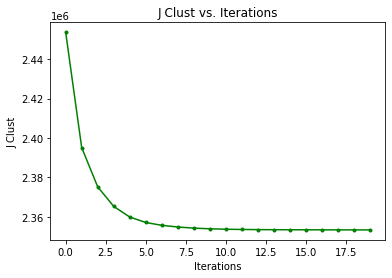

In [ ]:
group_assignment_indicies, list_of_k_group_representatives, j_clust, distance_matrix = run_k_means(x_train, 10, 20)

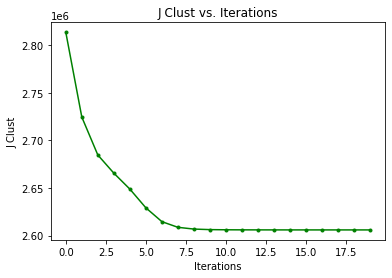

In [ ]:
group_assignment_indicies, list_of_k_group_representatives, j_clust, distance_matrix = run_k_means(x_train, 5, 20)